In [23]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(threshold=np.inf)
from heapq import nlargest

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Data Reading**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/WikiVote.csv',sep=',', header=None)
df.head()

,0,1
0,FromNodeId,ToNodeId
1,30,1412
2,30,3352
3,30,5254
4,30,5543


In [5]:
df = df.rename(columns=df.iloc[0]).drop(df.index[0])
df.head()

,FromNodeId,ToNodeId
1,30,1412
2,30,3352
3,30,5254
4,30,5543
5,30,7478


In [38]:
#Node list and adjacency list
dataset_file=open("/content/drive/MyDrive/WikiVote.csv")
lines = dataset_file.readlines()[1:]
adj_list={}
nodes=[]
edges=0
for i in lines:
    linedata = i.split(",")
    nodes.append(int(linedata[0]))
    nodes.append(int(linedata[1]))
    if int(linedata[0])  in adj_list:
        if int(linedata[1]) not in adj_list[int(linedata[0])]:
            adj_list[int(linedata[0])].append(int(linedata[1]))
            edges+=1
    else:
        adj_list[int(linedata[0])]=[]
        adj_list[int(linedata[0])].append(int(linedata[1]))
        edges+=1

all_nodes=list(set(nodes))
print("Nodes count:",len(all_nodes))
print("Smallest node:",min(all_nodes))
print("Largest node:",max(all_nodes))
print("Edges count:",edges)
print("Nodes:",all_nodes)
print("Adjacency list:",adj_list)


Nodes count: 7115
Smallest node: 3
Largest node: 8297
Edges count: 103689
Nodes: [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214,

In [48]:
#Adjacency matrix
adj_matrix=[[0 for i in range(max(all_nodes))]for i in range(max(all_nodes))]
for pos in  adj_list:
    for  v in adj_list[pos]:
        adj_matrix[pos-1][v-1]=1

### **Graph Creation**

In [9]:
#Create Graph 
G=nx.DiGraph()

#Add nodes
node_list=[]
for j in range(1,max(all_nodes)):
    node_list.append(j)

G.add_nodes_from(node_list)

#Add edges
node_pair_list=[]
for i in adj_list:
    for j in adj_list[i]:
        node_pair_list.append((i,j))
        
G.add_edges_from(node_pair_list)
print(node_pair_list)


[(30, 1412), (30, 3352), (30, 5254), (30, 5543), (30, 7478), (3, 28), (3, 30), (3, 39), (3, 54), (3, 108), (3, 152), (3, 178), (3, 182), (3, 214), (3, 271), (3, 286), (3, 300), (3, 348), (3, 349), (3, 371), (3, 567), (3, 581), (3, 584), (3, 586), (3, 590), (3, 604), (3, 611), (3, 8283), (25, 3), (25, 6), (25, 8), (25, 19), (25, 23), (25, 28), (25, 29), (25, 30), (25, 33), (25, 35), (25, 50), (25, 54), (25, 55), (25, 75), (25, 80), (25, 86), (25, 94), (25, 127), (25, 152), (25, 154), (25, 182), (25, 192), (25, 214), (25, 224), (25, 226), (25, 246), (25, 252), (25, 255), (25, 257), (25, 261), (25, 271), (25, 273), (25, 280), (25, 282), (25, 286), (25, 299), (25, 300), (25, 302), (25, 306), (25, 308), (25, 310), (25, 322), (25, 325), (25, 339), (25, 348), (25, 349), (25, 356), (25, 358), (25, 363), (25, 370), (25, 371), (25, 373), (25, 377), (25, 379), (25, 407), (25, 415), (25, 422), (25, 428), (25, 439), (25, 488), (25, 514), (25, 545), (25, 549), (25, 560), (25, 590), (25, 592), (25, 6

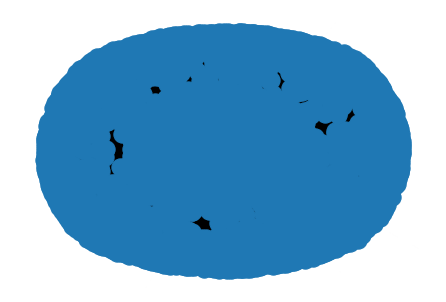

In [ ]:
nx.draw(G,cmap = plt.get_cmap('jet'))

### **1. PageRank score for each node**




In [18]:
#Calculate Pagerank using networkx
pagerank = nx.pagerank(G)
print("Pagerank: ",pagerank)

Pagerank:  {1: 4.7660786889344714e-05, 2: 4.7660786889344714e-05, 3: 0.00019405306220767607, 4: 4.7660786889344714e-05, 5: 4.7660786889344714e-05, 6: 0.00029428173544419136, 7: 4.7660786889344714e-05, 8: 0.00030821778615986226, 9: 4.7660786889344714e-05, 10: 0.00040119789879768797, 11: 4.7660786889344714e-05, 12: 4.7660786889344714e-05, 13: 4.7660786889344714e-05, 14: 4.7660786889344714e-05, 15: 0.0034730989804857898, 16: 4.7660786889344714e-05, 17: 4.7660786889344714e-05, 18: 4.7660786889344714e-05, 19: 0.00012390805815488916, 20: 4.7660786889344714e-05, 21: 4.7660786889344714e-05, 22: 4.7660786889344714e-05, 23: 0.00016183640925224128, 24: 4.7660786889344714e-05, 25: 4.7660786889344714e-05, 26: 4.7660786889344714e-05, 27: 4.7660786889344714e-05, 28: 0.0016035650064867876, 29: 0.00017480654868658473, 30: 0.0001636958027002173, 31: 4.7660786889344714e-05, 32: 0.00018297960861946854, 33: 0.0003193979892303722, 34: 0.00024593273688709705, 35: 0.0006628540361632465, 36: 0.0001310123448532

### **2. Authority and Hub score for each node**

In [11]:
#Calculate Hub,Authority using networkx
hub,authority = nx.hits(G)
print("Hub: ",hub)
print("Authority: ",authority)

Hub:  {1: 0.0, 2: 0.0, 3: 4.021031639777644e-05, 4: 7.31960768582419e-05, 5: 3.5017884744336435e-05, 6: 0.001053987286176362, 7: 8.200618013274951e-05, 8: 0.0003200123333087151, 9: 0.0002318196335517146, 10: 0.00018207047608178461, 11: 0.004921182063808105, 12: 0.0002882286245176333, 13: 3.1200539556819355e-05, 14: 0.0004975871202612589, 15: 0.00041573260338093835, 16: 8.409812451935363e-05, 17: 0.00010084393686112611, 18: 3.617008656019806e-05, 19: 7.217473720148215e-05, 20: 0.0008868292175658347, 21: 0.0002928634622208908, 22: 6.2173392000660115e-06, 23: 0.00018134382079422953, 24: 0.0026453591090555948, 25: 0.00021311562589770787, 26: 0.00014589156389685848, 27: 0.0005196190515395972, 28: 0.00035693360951943696, 29: 0.0006751699797052777, 30: 7.925509536668044e-05, 31: 3.7014857557552125e-05, 32: 1.3200870183843298e-05, 33: 6.990816089010817e-05, 34: 8.007226195926278e-06, 35: 0.0002194258352811278, 36: 0.0019031263078179547, 37: 0.0001975968782896225, 38: 4.947377401933715e-05, 39:

In [37]:
#Pagerank algo
def pagerank(G, damping_factor = .85, iter = 2):
    prevranks = {}
    newranks = {}
    for node in G.nodes():
        prevranks[node] = 1 / len(G.nodes())

    while iter > 0:
        for node in G.nodes():
            #current pagerank reset
            newranks[node] = 1 / len(G.nodes())
        for node in G.nodes():
            total = 0
            for edge in G.edges():
                #when curr node is source
                if(edge[1] == node):
                    total += (prevranks[edge[0]]/G.out_degree(edge[0]))
            newranks[node] = (1-damping_factor) + (damping_factor*total)  
        prevranks = newranks
        iter = iter - 1
    return newranks

In [13]:
#Hits algo
def hits(A):
    hubVecLst = []
    transpose = np.transpose(A)
    n = len(A[0]) 
    for i in range(n):
        hubVecLst.append(1)
    hubVector = np.array(hubVecLst)
    authorityVector = np.dot(transpose, hubVector)
    hubVector = np.dot(A, authorityVector)
    return hubVector,authorityVector

In [46]:
algoPagerank = pagerank(G)
print(algoPagerank)

{1: 0.15000000000000002, 2: 0.15000000000000002, 3: 0.1501183165775849, 4: 0.15000000000000002, 5: 0.15000000000000002, 6: 0.1558501335560147, 7: 0.15000000000000002, 8: 0.160729208381998, 9: 0.15000000000000002, 10: 0.16284812173090774, 11: 0.15000000000000002, 12: 0.15000000000000002, 13: 0.15000000000000002, 14: 0.15000000000000002, 15: 0.15441158621552858, 16: 0.15000000000000002, 17: 0.15000000000000002, 18: 0.15000000000000002, 19: 0.15301917532670045, 20: 0.15000000000000002, 21: 0.15000000000000002, 22: 0.15000000000000002, 23: 0.16719203078852216, 24: 0.15000000000000002, 25: 0.15000000000000002, 26: 0.15000000000000002, 27: 0.15000000000000002, 28: 0.2099873159316165, 29: 0.1553692279634813, 30: 0.28779333032378207, 31: 0.15000000000000002, 32: 0.16204643878203814, 33: 0.1772860364812474, 34: 0.15993130896750202, 35: 0.16404413498679848, 36: 0.1627288077411169, 37: 0.15000000000000002, 38: 0.18492675489970078, 39: 0.1907062566935967, 40: 0.15000000000000002, 41: 0.15000000000

In [13]:
algoHub,algoAuthority = hits(adj_matrix)
print("Hub: ", algoHub[:20])
print("Authority: ", algoAuthority[:20])

Hub:  [    0     0   966  1487   732 12781  1437  5749  3767  2993 41941  3622
   687  6150  4844  1119  2050   580  1515  9536]
Authority:  [  0   0  31   0   0  20   0  44   0  15   0   0   0   0 361   0   0   0
  22   0]


### **3. Compare the results obtained from both the algorithms in parts 1 and 2 based on the node scores.**

In [24]:
#Find top 10 highest pagerank score nodes
highestPageranks = nlargest(10, pagerank, key=pagerank.get)
for node in highestPageranks: 
    print(node, ':',  pagerank.get(node))

4037 : 0.004349070572777368
15 : 0.0034730989804857898
6634 : 0.0033100848020831634
2625 : 0.0030997039963222037
2398 : 0.002458151746777155
2470 : 0.0023869661176755936
2237 : 0.0023599269720822776
4191 : 0.002136846007631464
7553 : 0.0020490084362567926
5254 : 0.002029058301350638


In [25]:
#Find top 10 highest authority score nodes
highestAuthorities = nlargest(10, authority, key=authority.get)
for node in highestAuthorities: 
    print(node, ':',  authority.get(node))

2398 : 0.0025801471780088738
4037 : 0.002573241124229792
3352 : 0.0023284150914976826
1549 : 0.002303731480457179
762 : 0.0022558748562871394
3089 : 0.0022534066884511627
1297 : 0.0022501446366627233
2565 : 0.0022235641039536126
15 : 0.002201543492565581
2625 : 0.002197896803403073


In [26]:
#Find top 10 highest hub score nodes
highestHubs = nlargest(10, hub, key=hub.get)
for node in highestHubs: 
    print(node, ':',  hub.get(node))

2565 : 0.007940492708143145
766 : 0.007574335297501249
2688 : 0.006440248991029864
457 : 0.006416870490261073
1166 : 0.006010567902411202
1549 : 0.005720754058269244
11 : 0.004921182063808105
1151 : 0.0045720407017564085
1374 : 0.004467888792711107
1133 : 0.003918881732057349


**Since PageRank computes a ranking of nodes in the graph based on the structure of the incoming links. Also,HITS algorithm computes the authority score for a node based on the incoming links. To verify,since page 4037 is among the top in pagerank and authority score.It has greater number of in-degrees than out-degrees.**

In [44]:
print(G.in_edges(4037))
print(len(G.in_edges(4037)))

[(6, 4037), (15, 4037), (47, 4037), (72, 4037), (71, 4037), (87, 4037), (68, 4037), (109, 4037), (113, 4037), (127, 4037), (136, 4037), (143, 4037), (173, 4037), (182, 4037), (166, 4037), (237, 4037), (280, 4037), (290, 4037), (315, 4037), (317, 4037), (335, 4037), (395, 4037), (407, 4037), (325, 4037), (432, 4037), (447, 4037), (457, 4037), (546, 4037), (600, 4037), (495, 4037), (634, 4037), (637, 4037), (643, 4037), (667, 4037), (722, 4037), (737, 4037), (697, 4037), (749, 4037), (789, 4037), (791, 4037), (795, 4037), (825, 4037), (856, 4037), (852, 4037), (896, 4037), (967, 4037), (974, 4037), (988, 4037), (1006, 4037), (1008, 4037), (1032, 4037), (1037, 4037), (1055, 4037), (1098, 4037), (1132, 4037), (1133, 4037), (1144, 4037), (1151, 4037), (1165, 4037), (1166, 4037), (1193, 4037), (1204, 4037), (1210, 4037), (1358, 4037), (1374, 4037), (1385, 4037), (1184, 4037), (1471, 4037), (1492, 4037), (1538, 4037), (1542, 4037), (1552, 4037), (1549, 4037), (1608, 4037), (1614, 4037), (1623

In [45]:
print(G.out_edges(4037))
print(len(G.out_edges(4037)))

[(4037, 15), (4037, 825), (4037, 1385), (4037, 2014), (4037, 2958), (4037, 3498), (4037, 3717), (4037, 4138), (4037, 4256), (4037, 4402), (4037, 5226), (4037, 5693), (4037, 6124), (4037, 7699), (4037, 8294)]
15


**Since HITS algorithm computes the hub score based on outgoing links.To verify, page 2565 is has the highest hub score.As we can see below,it has large number of out-degrees than in-degrees.**

In [46]:
print(G.out_edges(2565))
print(len(G.out_edges(2565)))

[(2565, 56), (2565, 155), (2565, 204), (2565, 214), (2565, 285), (2565, 290), (2565, 346), (2565, 403), (2565, 417), (2565, 425), (2565, 465), (2565, 633), (2565, 737), (2565, 762), (2565, 765), (2565, 825), (2565, 827), (2565, 840), (2565, 856), (2565, 938), (2565, 967), (2565, 974), (2565, 1024), (2565, 1026), (2565, 1100), (2565, 1154), (2565, 1157), (2565, 1166), (2565, 1185), (2565, 1191), (2565, 1211), (2565, 1239), (2565, 1247), (2565, 1267), (2565, 1291), (2565, 1297), (2565, 1305), (2565, 1307), (2565, 1310), (2565, 1315), (2565, 1357), (2565, 1360), (2565, 1374), (2565, 1384), (2565, 1385), (2565, 1393), (2565, 1403), (2565, 1416), (2565, 1419), (2565, 1437), (2565, 1493), (2565, 1498), (2565, 1548), (2565, 1549), (2565, 1571), (2565, 1596), (2565, 1633), (2565, 1637), (2565, 1646), (2565, 1653), (2565, 1679), (2565, 1680), (2565, 1688), (2565, 1705), (2565, 1706), (2565, 1723), (2565, 1729), (2565, 1734), (2565, 1744), (2565, 1754), (2565, 1769), (2565, 1777), (2565, 1781), 

In [47]:
print(G.in_edges(2565))
print(len(G.in_edges(2565)))

[(11, 2565), (14, 2565), (20, 2565), (47, 2565), (29, 2565), (72, 2565), (87, 2565), (99, 2565), (68, 2565), (122, 2565), (127, 2565), (166, 2565), (306, 2565), (311, 2565), (313, 2565), (425, 2565), (457, 2565), (634, 2565), (637, 2565), (722, 2565), (737, 2565), (766, 2565), (784, 2565), (813, 2565), (854, 2565), (856, 2565), (879, 2565), (988, 2565), (1050, 2565), (1055, 2565), (1098, 2565), (1166, 2565), (1167, 2565), (1198, 2565), (1210, 2565), (1259, 2565), (1305, 2565), (1319, 2565), (1367, 2565), (1368, 2565), (1374, 2565), (1384, 2565), (1463, 2565), (1487, 2565), (1522, 2565), (1549, 2565), (1583, 2565), (1596, 2565), (1608, 2565), (1612, 2565), (1621, 2565), (1622, 2565), (1644, 2565), (1661, 2565), (1700, 2565), (1748, 2565), (1799, 2565), (1823, 2565), (1875, 2565), (1935, 2565), (1947, 2565), (1951, 2565), (1980, 2565), (1990, 2565), (1794, 2565), (2102, 2565), (2109, 2565), (2129, 2565), (2135, 2565), (2145, 2565), (2229, 2565), (2237, 2565), (2258, 2565), (2290, 2565), 

In [31]:
pagerank_list=[]
hub_list=[]
authority_list=[]
for j in range(1,len(all_nodes)):
    pagerank_list.append(pagerank[j])
    hub_list.append(hub[j])
    authority_list.append(authority[j])

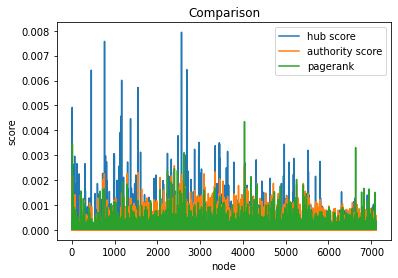

In [32]:
plt.plot(node_list[:7114], hub_list[:7114], label='hub score') 
plt.plot(node_list[:7114], authority_list[:7114], label='authority score') 
plt.plot(node_list[:7114], pagerank_list[:7114], label='pagerank') 
    
plt.xlabel('node') 
plt.ylabel('score') 
plt.title('Comparison') 
plt.legend() 
plt.show()

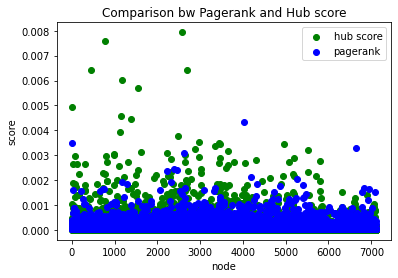

In [35]:
plt.scatter(node_list[:7114], hub_list[:7114], color='g', label='hub score')
plt.scatter(node_list[:7114], pagerank_list[:7114], color='b', label='pagerank')
plt.xlabel('node')
plt.ylabel('score')
plt.title('Comparison bw Pagerank and Hub score')
plt.legend()
plt.show()

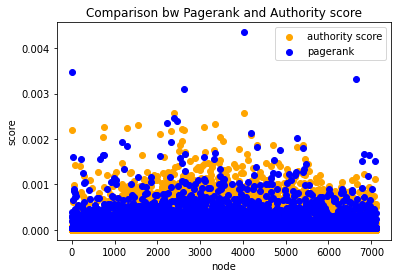

In [33]:
plt.scatter(node_list[:7114], authority_list[:7114], color='orange',label='authority score')
plt.scatter(node_list[:7114], pagerank_list[:7114], color='b',label='pagerank')
plt.xlabel('node')
plt.ylabel('score')
plt.title('Comparison bw Pagerank and Authority score') 
plt.legend()
plt.show()